# CNNs fo MNIST

#### Import Library

In [1]:
import torch
import torchvision

### Tunning Parameter

In [2]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10
random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

### Preapering Data Set

In [3]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)
test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

## Didalam Cell ini akan melakukan pendownloadan Dataset train dan juga test hasil download akan bisa diliat dicell berikutnya

In [4]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

# Setelah melakukan pendownloadan maka bisa kita panggil untuk meilhat batch data test

In [5]:
example_data.shape

# Terlihat dari hasil data disni berbentuk tensor dengan data 1000 contoh dengan 28x28 pixel berwarna abu abu

torch.Size([1000, 1, 28, 28])

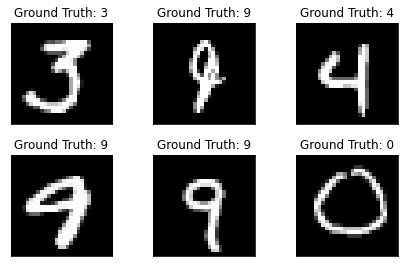

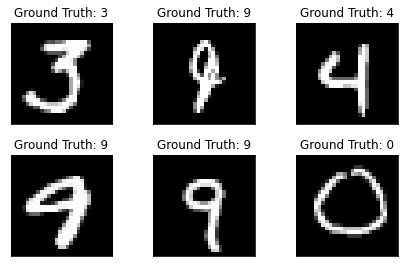

In [6]:
### Disini akan menampilkan hasil dari dataset yang terlah didownload dengan menggunakan library matplotlib

import matplotlib.pyplot as plt
fig = plt.figure() #pembuatan figure dan untuk menampilkan hasil keseluruhan
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none') #Untuk menampilkan gambar tertentu i
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])
fig

### Import Library

In [7]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [56]:
### Tuning parameter algoritma dengan Membuat input layer, hidden layer, fully-connected layer
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [57]:
### untuk melakukan penentuan hasil output
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,momentum=momentum)

In [58]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [44]:
### Terjadinya proses train data dengan memanggil parameter tertentu dengan menambahkan data dan target

def train(epoch):
    network.train() #Pemanggilan Model Algoritma
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch, batch_idx * len(data), len(train_loader.dataset), 100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
           
        torch.save(network.state_dict(), 'results/model.pth') #Menyimpan Model Algoritma
        torch.save(optimizer.state_dict(), 'results/optimizer.pth') #Menyimpan Optimizer atau hasil Algoritma

In [54]:
def test():
    network.eval() # Memanggil Algoritma
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = network(data)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
            test_loss /= len(test_loader.dataset)
            test_losses.append(test_loss)
            print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct, len(test_loader.dataset), 100. * correct / len(test_loader.dataset)))

In [46]:
test() # melakukan pemanggilan fungsi serta menjalankan program
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()

<ipython-input-41-3149a0a29766>:16: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
C:\Users\Fajri\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3211, Accuracy: 709/10000 (7%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.346169
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.293825
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.282964
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.255113
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.282657
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.274499
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.259117
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.202896
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.203538
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.189809
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.105274
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.097813
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.997552
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.851251
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.850068
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.680014
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.503588
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.672012
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.372670
Train Epoch: 1 [12160/6

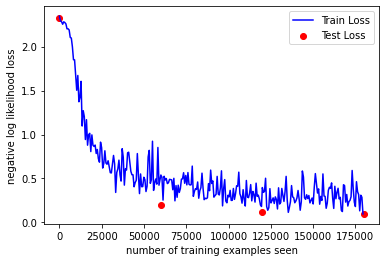

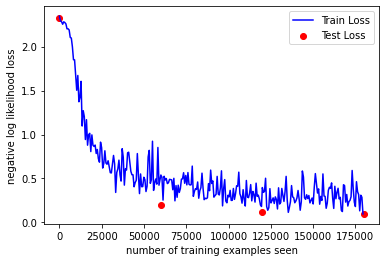

In [47]:
# Hasil visualisasi train_losses dan Test Loss

fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

In [48]:
# Pemanggilan data sebelumnya untuk melakukan kompirasi data yang sudah training dan yang belum

with torch.no_grad():
    output = network(example_data)

<ipython-input-41-3149a0a29766>:16: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


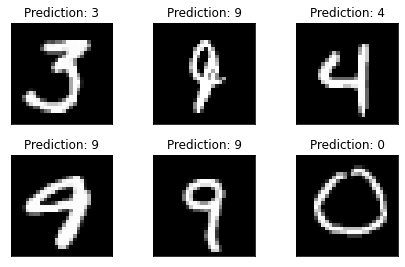

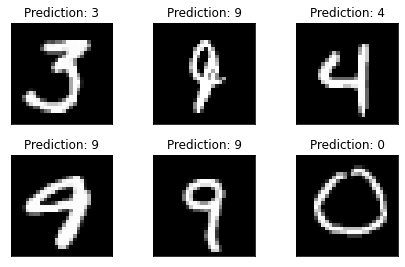

In [49]:
fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Prediction: {}".format(
        output.data.max(1, keepdim=True)[1][i].item()))
    plt.xticks([])
    plt.yticks([])
fig

In [59]:
### Pemanggilan Model yang sudah jadi atau yang sudah disave sebelumnya

In [50]:
continued_network = Net()
continued_optimizer = optim.SGD(network.parameters(), lr=learning_rate,momentum=momentum)

In [51]:
network_state_dict = torch.load('results/model.pth')
continued_network.load_state_dict(network_state_dict)
optimizer_state_dict = torch.load('results/optimizer.pth')
continued_optimizer.load_state_dict(optimizer_state_dict)

In [52]:
for i in range(4,9):
    test_counter.append(i*len(train_loader.dataset))
    train(i)
    test()

<ipython-input-41-3149a0a29766>:16: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 4 [0/60000 (0%)]	Loss: 0.156416
Train Epoch: 4 [640/60000 (1%)]	Loss: 0.575882
Train Epoch: 4 [1280/60000 (2%)]	Loss: 0.236797
Train Epoch: 4 [1920/60000 (3%)]	Loss: 0.297539
Train Epoch: 4 [2560/60000 (4%)]	Loss: 0.232915
Train Epoch: 4 [3200/60000 (5%)]	Loss: 0.362684
Train Epoch: 4 [3840/60000 (6%)]	Loss: 0.184229
Train Epoch: 4 [4480/60000 (7%)]	Loss: 0.293090
Train Epoch: 4 [5120/60000 (9%)]	Loss: 0.272860
Train Epoch: 4 [5760/60000 (10%)]	Loss: 0.194356
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.459007
Train Epoch: 4 [7040/60000 (12%)]	Loss: 0.215992
Train Epoch: 4 [7680/60000 (13%)]	Loss: 0.544303
Train Epoch: 4 [8320/60000 (14%)]	Loss: 0.203484
Train Epoch: 4 [8960/60000 (15%)]	Loss: 0.427726
Train Epoch: 4 [9600/60000 (16%)]	Loss: 0.250937
Train Epoch: 4 [10240/60000 (17%)]	Loss: 0.372618
Train Epoch: 4 [10880/60000 (18%)]	Loss: 0.270845
Train Epoch: 4 [11520/60000 (19%)]	Loss: 0.300401
Train Epoch: 4 [12160/60000 (20%)]	Loss: 0.349932
Train Epoch: 4 [12800/60000 (

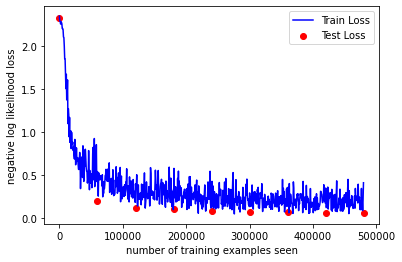

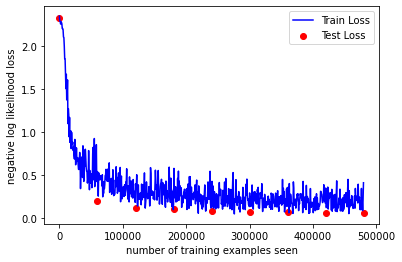

In [53]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig